## Assignment-3

## Eric Johansson & Max Sonnelid

Keywords: heat map, scatter plot, K-means clustering, elbow graph, cluster visualization, DBSCAN clustering, outliers

## 1.a - Making a scatter plot

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [137]:
#Selecting phi as x axis and psi as y axis

df = pd.read_csv('data_all.csv')
x = pd.DataFrame(df, columns = ['phi'])
y = pd.DataFrame(df, columns = ['psi'])

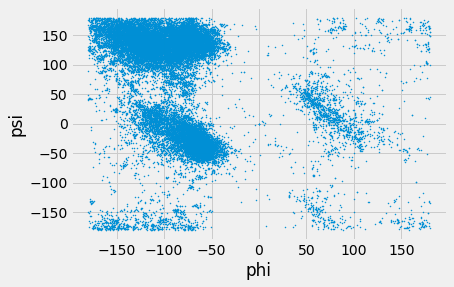

In [138]:
#Creating the scatter plot

df.plot.scatter(x='phi', y='psi', s=1)
plt.show()

## 1.b

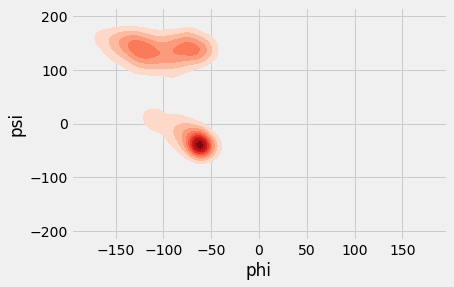

In [139]:
# library & dataset
import seaborn as sns
 
# Basic 2D density plot
#sns.set_style("white")
sns.kdeplot(df['phi'], df['psi'], cmap="Reds", shade=True, shade_lowest=False)

## 2 - K-means clustering

In [240]:
df = pd.read_csv('data_all.csv')
X=df.iloc[:, [3,4]].values  #Turning the phi and psi columns of the dataset into a matrix
res_X=df.iloc[:, [0]].values #Creating a column vector with all the residue types

In [241]:
# Make sure that all values are positive. Negative values are rotated on cycle
for i in X:
    if i[0] < 0:
        i[0] = i[0] + 360 
    if i[1] < 0:
        i[1] = i[1] + 360 

# Offsets the graph in order to avoid dots close to borders         
for i in X:
    if i[0] < 150:
        i[0] = i[0] + 360 
    if i[1] < 250:
        i[1] = i[1] + 360 

# 
for i in X:
    i[0] = i[0] - 150
    i[1] = i[1] - 250 

In [ ]:
X

In [221]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "max_iter": 300,
  "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

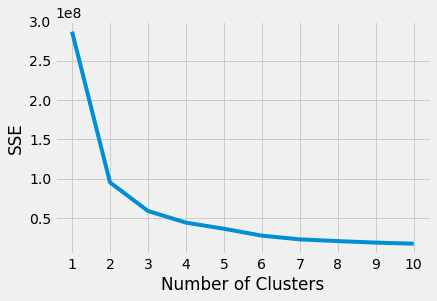

In [238]:
#Plot an elbow graph

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [226]:
#Perform the kmeans clustering for k=3
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [227]:
#Calculate the silhouette score for the above clustering method
metrics.silhouette_score(X, labels, metric='euclidean')

0.6544707998193077

In [147]:
y_kmeans = kmeans.fit_predict(X)

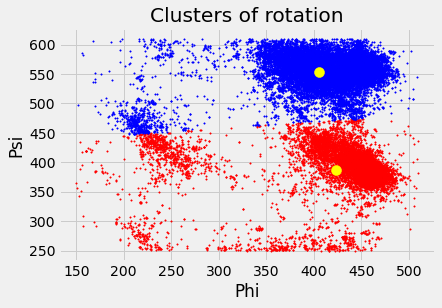

In [73]:
#Create a scatter plot with the clusters visualized
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=2, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=2, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=2, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=50, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=50, c='magenta', label ='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids')
plt.title('Clusters of rotation')
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.show()

In [15]:
#X

## 3a

In [192]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [107]:
#X = StandardScaler().fit_transform(X)

In [81]:
X.shape

(29369, 2)

In [242]:
#Perform the DBSCAN clustering with eps=35 and min_samples=2437
db = DBSCAN(eps=35, min_samples=2437).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
silhouette = metrics.silhouette_score(X, labels, metric='euclidean')

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print(silhouette)

Estimated number of clusters: 2
Estimated number of noise points: 2428
0.6544707998193077


In [247]:
lz = np.array([labels]) #Array with all the labels for the data points from the DBSCAN clustering

dbscan_res = np.concatenate((lz.T, res_X),axis=1) #Add the residue types beside the labels

I = dbscan_res[dbscan_res[:,0] == -1] #Only select the outliers to a new matrix

I

array([[-1, 'GLY'],
       [-1, 'GLY'],
       [-1, 'GLY'],
       ...,
       [-1, 'PHE'],
       [-1, 'GLY'],
       [-1, 'GLY']], dtype=object)

In [248]:
#Count the number of outliers per residue type
unique_elements, counts_elements = np.unique(I[:,1], return_counts=True)
print("Frequency of unique values of the said array:")
np.asarray((unique_elements, counts_elements))

Frequency of unique values of the said array:


array([['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS',
        'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP',
        'TYR', 'VAL'],
       [77, 60, 261, 112, 24, 42, 90, 1161, 96, 17, 38, 128, 12, 22, 12,
        133, 26, 11, 47, 59]], dtype=object)

In [245]:
#Create an array with the share of outliers for each residue type
unique_elements, counts_outliers = np.unique(I[:,1], return_counts=True)
unique_elements, counts_total = np.unique(dbscan_res[:,1], return_counts=True)

out = np.divide(counts_outliers, counts_total)
out

array([0.0497416 , 0.04078858, 0.18723099, 0.06511628, 0.03234501,
       0.03299293, 0.0596817 , 0.53354779, 0.12885906, 0.01223022,
       0.01500197, 0.06333498, 0.02439024, 0.01737757, 0.0075188 ,
       0.06366683, 0.01464789, 0.02488688, 0.03512706, 0.03189189])

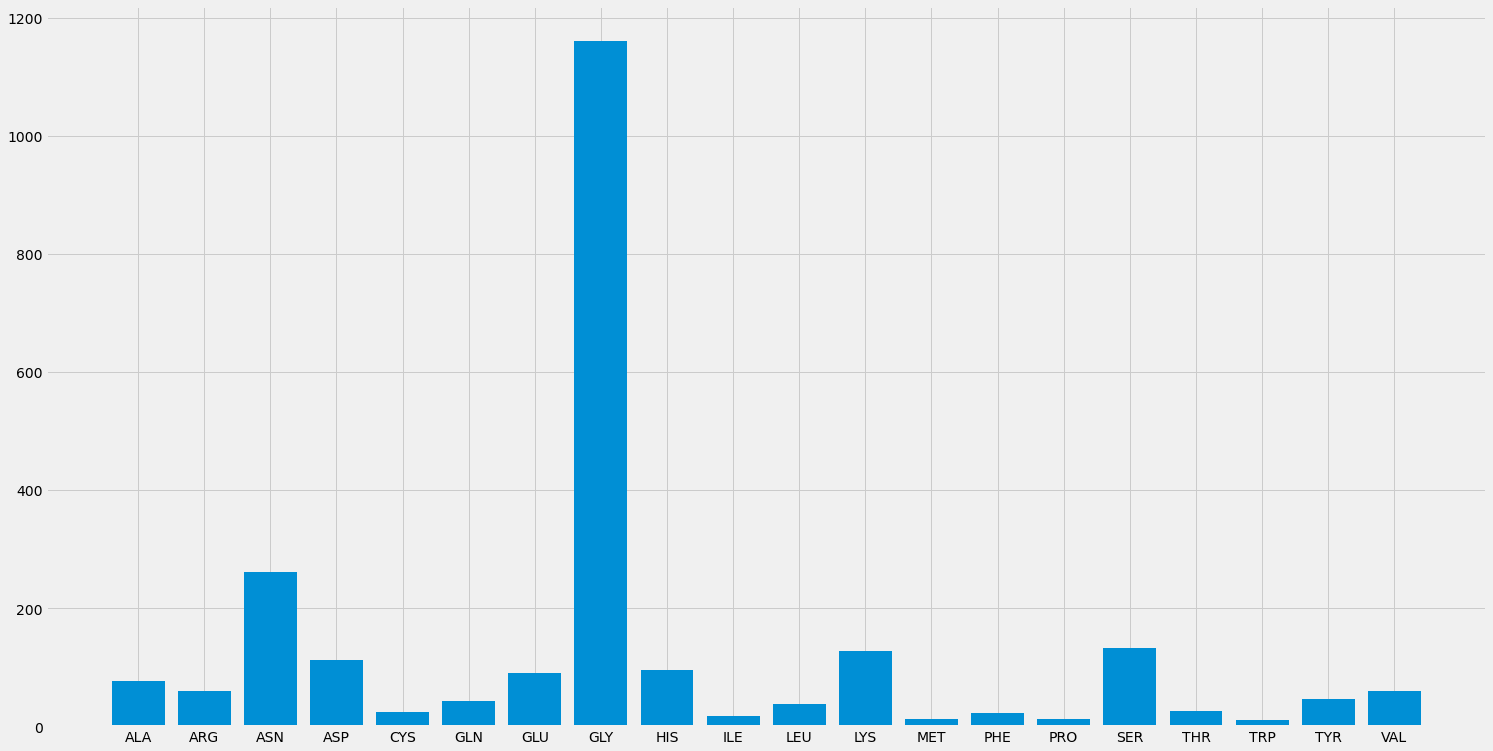

In [250]:
#Bar chart with the share of outliers for each residue type
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(unique_elements, counts_outliers)
plt.show()

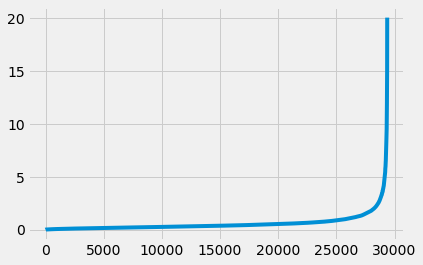

In [251]:
#Create NearestNeighbors graph
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

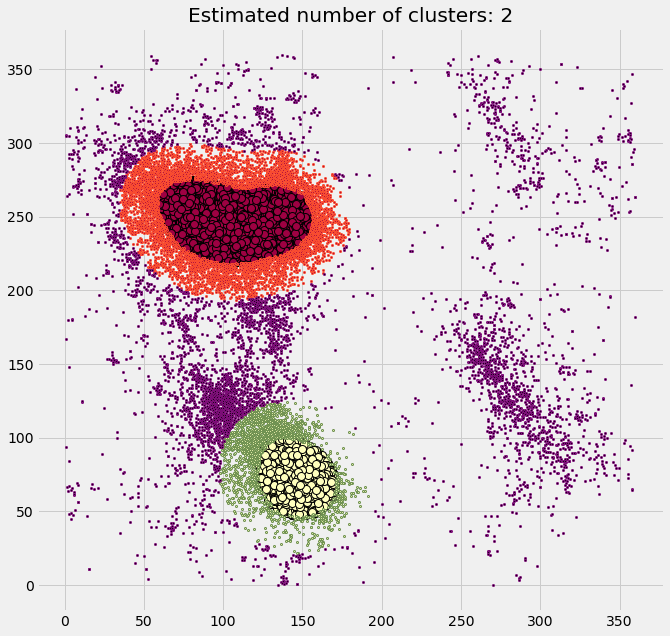

In [198]:
# Plot result for DBSCAN clustering
# Black removed and is used for noise instead.
plt.figure(figsize=(10,10))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markersize=2)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()



In [199]:
#Calculate silhouette value
metrics.silhouette_score(X, labels, metric='euclidean')

0.5228815326111835

# Task 4

In [149]:
#Create subset with only PRO residue types
pro_df = df.loc[df['residue name'] == 'PRO']
pro_df

,residue name,position,chain,phi,psi
1,PRO,11,A,-44.283210,136.002076
17,PRO,27,A,-49.944645,-25.888991
68,PRO,79,A,-76.452014,97.745207
110,PRO,121,A,-53.054020,-27.254912
123,PRO,134,A,-66.751364,94.099782
...,...,...,...,...,...
29284,PRO,288,B,-54.565923,-42.141418
29339,PRO,349,B,-66.803083,136.260650
29340,PRO,350,B,-59.612140,160.048387
29347,PRO,357,B,-48.679835,135.208297


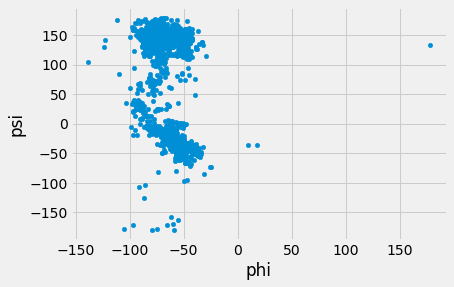

In [150]:
#Create scatterplot
pro_df.plot.scatter(x='phi', y='psi')
plt.show()

In [182]:
PRO_X=pro_df.iloc[:, [3,4]].values

# Make sure that all values are positive. Negative values are rotated on cycle
for i in PRO_X:
    if i[0] < 0:
        i[0] = i[0] + 360 
    if i[1] < 0:
        i[1] = i[1] + 360 

# Offsets the graph in order to avoid dots close to borders         
for i in PRO_X:
    if i[0] < 150:
        i[0] = i[0] + 360 
    if i[1] < 250:
        i[1] = i[1] + 360 

# 
for i in PRO_X:
    i[0] = i[0] - 150
    i[1] = i[1] - 250 

In [183]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "max_iter": 300,
  "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(PRO_X)
    sse.append(kmeans.inertia_)

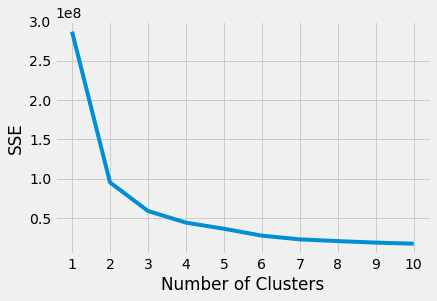

In [249]:
#Create elbow graph
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

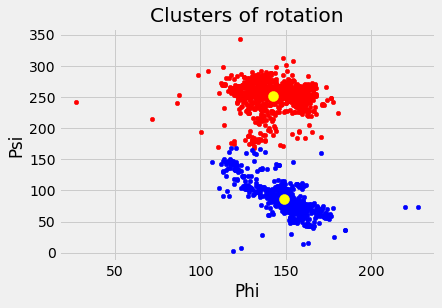

In [185]:
#Perform KMeans clustering for PRO types and create graph
kmeans = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

y_kmeans = kmeans.fit_predict(PRO_X)

plt.scatter(PRO_X[y_kmeans==0, 0], PRO_X[y_kmeans==0, 1], s=20, c='red', label ='Cluster 1')
plt.scatter(PRO_X[y_kmeans==1, 0], PRO_X[y_kmeans==1, 1], s=20, c='blue', label ='Cluster 2')
plt.scatter(PRO_X[y_kmeans==2, 0], PRO_X[y_kmeans==2, 1], s=20, c='green', label ='Cluster 3')
plt.scatter(PRO_X[y_kmeans==3, 0], PRO_X[y_kmeans==3, 1], s=50, c='cyan', label ='Cluster 4')
plt.scatter(PRO_X[y_kmeans==4, 0], PRO_X[y_kmeans==4, 1], s=50, c='magenta', label ='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids')
plt.title('Clusters of rotation')
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.show()

In [158]:
#Create subset with only GLY residue types
gly_df = df.loc[df['residue name'] == 'GLY']
gly_df

,residue name,position,chain,phi,psi
9,GLY,19,A,93.478288,-26.252796
10,GLY,20,A,65.608117,55.368614
19,GLY,29,A,72.426939,7.659478
23,GLY,33,A,-140.433679,159.800231
42,GLY,52,A,-122.469112,-4.890135
...,...,...,...,...,...
29289,GLY,293,B,108.580759,6.090040
29307,GLY,311,B,78.623741,-165.412896
29328,GLY,332,B,-169.931921,-165.965587
29358,GLY,368,B,78.873564,3.599175


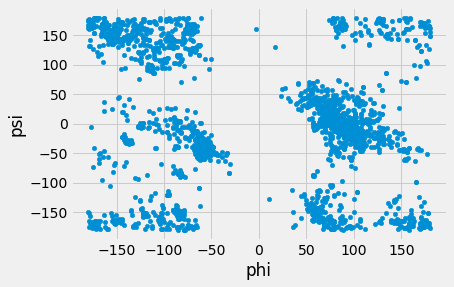

In [159]:
#Create scatter plot
gly_df.plot.scatter(x='phi', y='psi')
plt.show()

In [186]:
#Create matrix
GLY_X=gly_df.iloc[:, [3,4]].values

# Make sure that all values are positive. Negative values are rotated on cycle
for i in GLY_X:
    if i[0] < 0:
        i[0] = i[0] + 360 
    if i[1] < 0:
        i[1] = i[1] + 360 

# Offsets the graph in order to avoid dots close to borders         
for i in GLY_X:
    if i[0] < 150:
        i[0] = i[0] + 360 
    if i[1] < 250:
        i[1] = i[1] + 360 

# 
for i in GLY_X:
    i[0] = i[0] - 150
    i[1] = i[1] - 250 

In [187]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "max_iter": 300,
  "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(GLY_X)
    sse.append(kmeans.inertia_)

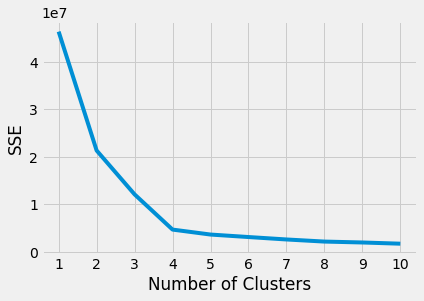

In [188]:
#Create elbow graph for GLY types
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

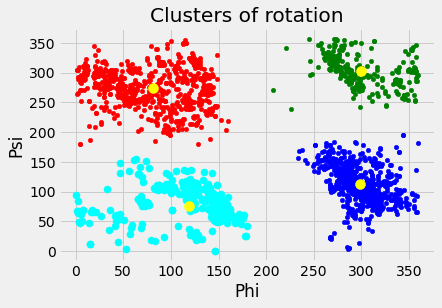

In [189]:
#Perform KMeans clustering for GLY types and create graph
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

y_kmeans = kmeans.fit_predict(GLY_X)

plt.scatter(GLY_X[y_kmeans==0, 0], GLY_X[y_kmeans==0, 1], s=20, c='red', label ='Cluster 1')
plt.scatter(GLY_X[y_kmeans==1, 0], GLY_X[y_kmeans==1, 1], s=20, c='blue', label ='Cluster 2')
plt.scatter(GLY_X[y_kmeans==2, 0], GLY_X[y_kmeans==2, 1], s=20, c='green', label ='Cluster 3')
plt.scatter(GLY_X[y_kmeans==3, 0], GLY_X[y_kmeans==3, 1], s=50, c='cyan', label ='Cluster 4')
plt.scatter(GLY_X[y_kmeans==4, 0], GLY_X[y_kmeans==4, 1], s=50, c='magenta', label ='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids')
plt.title('Clusters of rotation')
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.show()